<a href="https://colab.research.google.com/github/Anup-Sarkar-DD/GoogleColab_repo/blob/main/SpamClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split


In [3]:
df = pd.read_csv('Spam-Classification.csv')

In [4]:
df.head()

,CLASS,SMS
0,ham,"said kiss, kiss, i can't do the sound effects..."
1,ham,&lt;#&gt; ISH MINUTES WAS 5 MINUTES AGO. WTF.
2,spam,(Bank of Granite issues Strong-Buy) EXPLOSIVE ...
3,spam,* FREE* POLYPHONIC RINGTONE Text SUPER to 8713...
4,spam,**FREE MESSAGE**Thanks for using the Auction S...


In [5]:
spam_class = df['CLASS']
spam_text = df['SMS']

1) imports nltk
2) custom tokenizer function def customtokenize(str)
3) split the input string into tokens (words, punctuation, etc)
4) removes common stopworkds (like , the, and , etc.) from the token list
5) apply lemmatization to reduce the words to the thier root form (eg running >> run)
6) return lemmatized (returns the clean token list)

7) vectorizing text with TG-IDF(term frequecny * inverse document frequency >> highlights important words in each message)

8) applies the vectorizer to spam_message(text data) converting it to sparse matrix

9)for model input convert the spares matrix to regular numpy array



In [6]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [7]:
import tensorflow as tf

In [8]:
#custom tokenizer to remove stopwords and use lemmatization
def customtokenize(str):
  #split string as tokens
  tokens = word_tokenize(str)
  #filter for stopwords
  filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]
  #lemmatization
  lemmatizer = WordNetLemmatizer()
  lemmatized = [lemmatizer.lemmatize(word) for word in filtered_tokens]
  return lemmatized


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer as tfvm #tool of sklearn to convert text into matrix
#build TF_IDF Vectorizer model
vectorizer = tfvm(tokenizer = customtokenize)

#transform feature input to TF-IDF
tfidf = vectorizer.fit_transform(spam_text)

#convert to numpy array
tfidf = tfidf.toarray()


In [10]:
from sklearn.preprocessing import LabelEncoder
LEC = LabelEncoder()
spam_class = LEC.fit_transform(spam_class)

In [11]:
spam_class = tf.keras.utils.to_categorical(spam_class,2)

In [12]:
print("TF-IDF Matrix Shape : ", tfidf.shape)
print("One-hot Encoding Shape : ", spam_class.shape)

TF-IDF Matrix Shape :  (1500, 4568)
One-hot Encoding Shape :  (1500, 2)


In [13]:
X_train, X_test, y_train , y_test = train_test_split(tfidf, spam_class, test_size=0.10)

In [14]:
from tensorflow import keras
from keras import optimizers
from keras.regularizers import l2

In [15]:
#setup hyper parameter for building the model
a_classes = 2
b_hidden = 32

from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(b_hidden, input_shape=(X_train.shape[1],),name = 'hidden-layer-1',activation='relu'))
model.add(Dense(b_hidden, name='hidden-layer-2',activation='relu'))
model.add(Dense(a_classes, name= 'output-layer',activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',  metrics=['accuracy'])

summary = model.summary()

summary



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden-layer-1 (Dense)          │ (None, 32)             │       146,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden-layer-2 (Dense)          │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output-layer (Dense)            │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 147,330 (575.51 KB)

 Trainable params: 147,330 (575.51 KB)

 Non-trainable params: 0 (0.00 B)


 Training progress--------

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - accuracy: 0.5393 - loss: 0.6917 - val_accuracy: 0.6704 - val_loss: 0.6835
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8125 - loss: 0.6773 - val_accuracy: 0.8481 - val_loss: 0.6687
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9633 - loss: 0.6552 - val_accuracy: 0.9037 - val_loss: 0.6456
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9758 - loss: 0.6235 - val_accuracy: 0.9185 - val_loss: 0.6141
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9861 - loss: 0.5829 - val_accuracy: 0.9370 - val_loss: 0.5748
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9862 - loss: 0.5328 - val_accuracy: 0.9481 - val_loss: 0.5293
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9888 - loss: 0.4757 - val_accuracy: 0.9481 - val_loss: 0.4798
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9941 - loss: 0.4127 - val_accurac

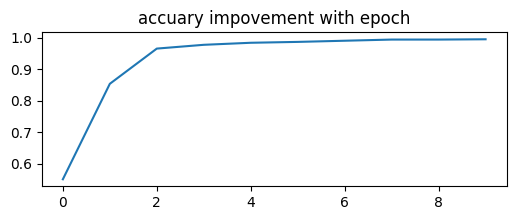

In [16]:
#progress bar
VERBOSE =1

#PARAMETER
BATCH_SIZE = 256
EPOCHS = 10
VALIDATION_SPLIT = 0.2

print("\n Training progress--------\n")

cont1=model.fit(X_train, y_train , batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)


print("\nAccuracy during Training :\n------------------------------------")

pd.DataFrame(cont1.history)['accuracy'].plot(figsize=(6,2))
plt.title("accuary impovement with epoch")
plt.show()


In [17]:
print("\nEvaluation against Test Dataset :\n------------------------------------")
model.evaluate(X_test,y_test)


Evaluation against Test Dataset :
------------------------------------
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9676 - loss: 0.3163 


[0.32315564155578613, 0.9599999785423279]

In [18]:
#Predict for multiple samples using batch processing

#Convert input into IF-IDF vector using the same vectorizer model
predict_tfidf=vectorizer.transform(["FREE entry to a fun contest",
                                    "Yup I will come over" ,"do you have free time "]).toarray()

print(predict_tfidf.shape)

#Predict using model
prediction=np.argmax( model.predict(predict_tfidf), axis=1 )
print("Prediction Output:" , prediction)

#Print prediction classes
print("Prediction Classes are ", LEC.inverse_transform(prediction))

(3, 4568)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Prediction Output: [1 0 0]
Prediction Classes are  ['spam' 'ham' 'ham']
